## Assignment 4 due march 3rd

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler


# Q1. Load the patient data from “ML_HW_Data_Patients.csv” file. 

data = pd.read_csv("ML_HW_Data_Patients.csv")


In [ ]:
# Q2: Use the following 7 variables Age, Gender, Height, Weight, Smoker, Location, SelfAssessedHealthStatus to build a linear regression model to predict the systolic blood pressure

# isolate the 7 predictors and the target variable

features = ['Age', 'Gender', 'Height', 'Weight', 'Smoker', 'Location', 'SelfAssessedHealthStatus']
target = 'Systolic'

X_raw = data[features]
y = data[target]

# FEATURE ENGINEERING
X_encoded = pd.get_dummies(X_raw, columns=['Gender', 'Location', 'SelfAssessedHealthStatus'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)


print("Engineered Features List:\n", X_encoded.columns.tolist())
print("\nShape of Final Feature Matrix X:", X_scaled_df.shape)
print("Shape of Target Vector y:", y.shape)

Engineered Features List:
 ['Age', 'Height', 'Weight', 'Smoker', "Gender_'Male'", "Location_'St. Mary's Medical Center'", "Location_'VA Hospital'", "SelfAssessedHealthStatus_'Fair'", "SelfAssessedHealthStatus_'Good'", "SelfAssessedHealthStatus_'Poor'"]

Shape of Final Feature Matrix X: (100, 10)
Shape of Target Vector y: (100,)


In [ ]:
# Build the Linear Regression Model
from sklearn.linear_model import LinearRegression

print("\n--- standard Linear Regression Model ---")
ols_model = LinearRegression()
ols_model.fit(X_scaled_df, y)

# calculated coefficients (Theta values)
for feature, coef in zip(X_scaled_df.columns, ols_model.coef_):
    print(f"{feature}: {coef:.4f}")

# count active predictors
active_predictors = sum(ols_model.coef_ != 0)
print(f"\nTotal active predictors in standard LR: {active_predictors}")


--- Standard Linear Regression Model ---
Age: 0.5762
Height: 1.3254
Weight: -0.3548
Smoker: 4.5822
Gender_'Male': -0.7384
Location_'St. Mary's Medical Center': -0.3658
Location_'VA Hospital': -0.8376
SelfAssessedHealthStatus_'Fair': -0.9823
SelfAssessedHealthStatus_'Good': 0.2873
SelfAssessedHealthStatus_'Poor': 0.1437

Total active predictors in standard LR: 10


In [ ]:
from sklearn.linear_model import LassoCV, Lasso
import numpy as np

# Q3: 10-Fold Cross-Validation Lasso
print("\n--- q3: 10-Fold CV Lasso ---")

#  LassoCV with 10 folds (cv=10)
lasso_cv = LassoCV(cv=10, random_state=42)
lasso_cv.fit(X_scaled_df, y)
print(f"The optimal Lambda (Alpha) found by 10-Fold CV is: {lasso_cv.alpha_:.4f}")


--- q3: 10-Fold CV Lasso ---
The optimal Lambda (Alpha) found by 10-Fold CV is: 0.3569


In [ ]:
# Q: 4, 5, & 6: Finding the Lambda for 2 Predictors

print("\n--- TRACING LAMBDA (0.0 to 1.0 in 0.1 steps) ---")
alphas_to_test = np.arange(0.0, 1.1, 0.1)

for a in alphas_to_test:
    if a == 0.0:
        model = LinearRegression()
    else:
        model = Lasso(alpha=a, random_state=42, max_iter=10000)
        
    model.fit(X_scaled_df, y)
    coefs = model.coef_

# count how many coefficients are active (NOT zero)

    non_zero_count = np.sum(coefs != 0)
    
    print(f"Lambda = {a:.1f} | Active Predictors: {non_zero_count}")

    # Extract values for grading when exactly 2 predictors remain
    if non_zero_count == 2:
        print("\n*** MATCH FOUND FOR QUESTIONS 4, 5, AND 6 ***")
        print(f"Q5 Answer -> Lambda (λ) chosen: {a:.1f}")
        print("Q4 & Q6 Answers -> The TWO remaining predictors and their Theta values:")
        for var, coef in zip(X_scaled_df.columns, coefs):
            if coef != 0:
                print(f"   Predictor: {var} | Value (Theta): {coef:.4f}")
        break # this will stop the search once we find the threshold



--- TRACING LAMBDA (0.0 to 1.0 in 0.1 steps) ---
Lambda = 0.0 | Active Predictors: 10
Lambda = 0.1 | Active Predictors: 9
Lambda = 0.2 | Active Predictors: 7
Lambda = 0.3 | Active Predictors: 5
Lambda = 0.4 | Active Predictors: 5
Lambda = 0.5 | Active Predictors: 5
Lambda = 0.6 | Active Predictors: 5
Lambda = 0.7 | Active Predictors: 2

*** MATCH FOUND FOR QUESTIONS 4, 5, AND 6 ***
Q5 Answer -> Lambda (λ) chosen: 0.7
Q4 & Q6 Answers -> The TWO remaining predictors and their Theta values:
   Predictor: Smoker | Value (Theta): 4.0159
   Predictor: SelfAssessedHealthStatus_'Fair' | Value (Theta): -0.3041


Plot generated and saved 


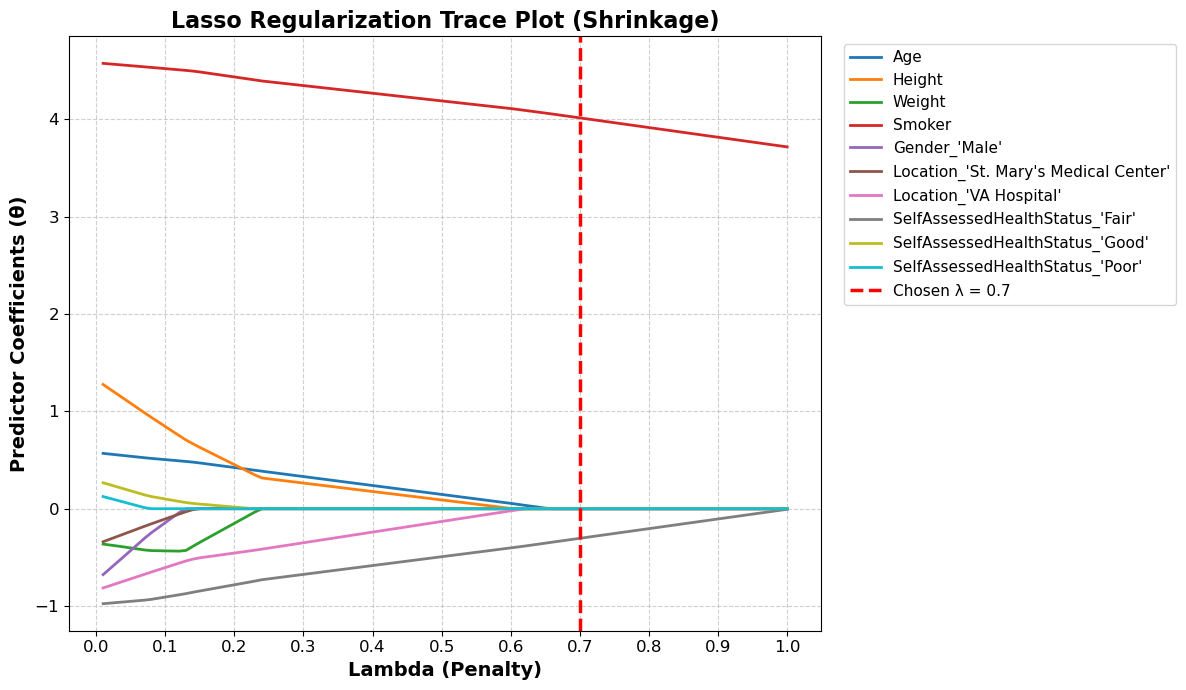

In [15]:
# Q7: CREATE CHART

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso

# dense array of lambdas for a smooth curve (0.01 to 1.0)
alphas_path = np.linspace(0.01, 1.0, 100)
coefs_path = []

# calc coef across the path
for a in alphas_path:
    lasso_trace = Lasso(alpha=a, max_iter=10000, random_state=42)
    lasso_trace.fit(X_scaled_df, y)
    coefs_path.append(lasso_trace.coef_)

# make the viz
plt.figure(figsize=(12, 7))
ax = plt.gca()

# plot the coeff paths
lines = ax.plot(alphas_path, coefs_path, linewidth=2)

# formatting
plt.xlabel('Lambda (Penalty)', fontsize=14, fontweight='bold')
plt.ylabel('Predictor Coefficients (\u03B8)', fontsize=14, fontweight='bold')
plt.title('Lasso Regularization Trace Plot (Shrinkage)', fontsize=16, fontweight='bold')

# tick labels shown
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.yticks(fontsize=12)

# distinct vertical line at chosen lambda of 0.7
plt.axvline(x=0.7, color='red', linestyle='--', linewidth=2.5, label='Chosen \u03BB = 0.7 (2 Predictors)')

# legend outside the plot area (help of ai to get this cleaned up)
feature_names = X_scaled_df.columns.tolist()
plt.legend(lines + [ax.lines[-1]], feature_names + ['Chosen \u03BB = 0.7'], 
           bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=11)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# save fig
plt.savefig('Lasso_Trace_Plot_Q7.png', dpi=300)
print("Plot generated and saved ")